# Initializing environment

In [1]:
import os, sys
print(f'{os.getcwd()=}')
print(f'{sys.executable=}')

sys_path_vllm = '/notebooks/vllm'
if os.path.isdir(sys_path_vllm) and sys_path_vllm not in sys.path:
    sys.path.insert(0, sys_path_vllm)

print('='*50)
for i,p in enumerate(sys.path):
    print(f'sys.path[{i}] = {p}')
print('='*50)

os.getcwd()='/notebooks'
sys.executable='/notebooks/vllm_venv/bin/python'
sys.path[0] = /notebooks/vllm
sys.path[1] = /usr/lib/python311.zip
sys.path[2] = /usr/lib/python3.11
sys.path[3] = /usr/lib/python3.11/lib-dynload
sys.path[4] = 
sys.path[5] = /notebooks/vllm_venv/lib/python3.11/site-packages
sys.path[6] = __editable__.vllm-0.9.2+cu118.finder.__path_hook__


In [2]:
import torch

print(f'{torch.__file__=}\n{torch.__version__=}')

if torch.cuda.is_available():
    print("CUDA device       :", torch.cuda.get_device_name(0))
    print("CUDA device index :", torch.cuda.current_device())
    print("Torch device used :", torch.tensor([0.0]).to("cuda").device)
else:
    print("CUDA NOT available --> using CPU")

torch.__file__='/notebooks/vllm_venv/lib/python3.11/site-packages/torch/__init__.py'
torch.__version__='2.7.0+cu118'
CUDA device       : NVIDIA RTX A5000
CUDA device index : 0
Torch device used : cuda:0


# Loading LLM

In [3]:
import numpy as np
from vllm import LLM, SamplingParams
# from vllm.lora.request import get_tokenizer
from sentence_transformers import SentenceTransformer

gen_model_name = "facebook/opt-125m"
embedding_model_name = "all-MiniLM-L6-v2"


llm = LLM(model=gen_model_name)

# tokenizer = get_tokenizer(gen_model_name)
tokenizer = llm.get_tokenizer()

embedding_model = SentenceTransformer(embedding_model_name)


INFO 07-22 12:09:06 [__init__.py:244] Automatically detected platform cuda.


config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

INFO 07-22 12:09:26 [config.py:841] This model supports multiple tasks: {'reward', 'embed', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 07-22 12:09:26 [config.py:1472] Using max model len 2048
INFO 07-22 12:09:28 [config.py:2285] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

WARNING 07-22 12:09:28 [__init__.py:2662] We must use the `spawn` multiprocessing start method. Overriding VLLM_WORKER_MULTIPROC_METHOD to 'spawn'. See https://docs.vllm.ai/en/latest/usage/troubleshooting.html#python-multiprocessing for more information. Reason: CUDA is initialized
INFO 07-22 12:09:32 [__init__.py:244] Automatically detected platform cuda.
INFO 07-22 12:09:34 [core.py:526] Waiting for init message from front-end.
INFO 07-22 12:09:34 [core.py:69] Initializing a V1 LLM engine (v0.9.2) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decodin

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading pt checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  5.12it/s]
Loading pt checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  5.12it/s]



INFO 07-22 12:09:39 [gpu_model_runner.py:1801] Model loading took 0.2389 GiB and 1.783883 seconds
INFO 07-22 12:09:48 [backends.py:508] Using cache directory: /root/.cache/vllm/torch_compile_cache/7b4b1a726a/rank_0_0/backbone for vLLM's torch.compile
INFO 07-22 12:09:48 [backends.py:519] Dynamo bytecode transform time: 8.51 s
INFO 07-22 12:09:50 [backends.py:181] Cache the graph of shape None for later use


[rank0]:W0722 12:09:50.766000 277 vllm_venv/lib/python3.11/site-packages/torch/_inductor/utils.py:1250] [0/0] Not enough SMs to use max_autotune_gemm mode


INFO 07-22 12:09:55 [backends.py:193] Compiling a graph for general shape takes 6.87 s
INFO 07-22 12:09:58 [monitor.py:34] torch.compile takes 15.38 s in total
INFO 07-22 12:09:59 [gpu_worker.py:232] Available KV cache memory: 20.54 GiB
INFO 07-22 12:10:00 [kv_cache_utils.py:716] GPU KV cache size: 598,240 tokens
INFO 07-22 12:10:00 [kv_cache_utils.py:720] Maximum concurrency for 2,048 tokens per request: 292.11x


Capturing CUDA graph shapes: 100%|██████████| 67/67 [00:19<00:00,  3.48it/s]


INFO 07-22 12:10:19 [gpu_model_runner.py:2326] Graph capturing finished in 19 secs, took 0.21 GiB
INFO 07-22 12:10:19 [core.py:172] init engine (profile, create kv cache, warmup model) took 39.48 seconds


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Loading Dataset

In [4]:
from datasets import load_dataset

dataset_name = "OpenAssistant/oasst1" # https://huggingface.co/datasets/OpenAssistant/oasst1
# Load all available splits
dataset_dict = load_dataset(dataset_name) 

dataset = dataset_dict['train'].filter(lambda x: x["lang"] == "en")


README.md: 0.00B [00:00, ?B/s]

(…)-00000-of-00001-b42a775f407cee45.parquet:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

(…)-00000-of-00001-134b8fd0c89408b6.parquet:   0%|          | 0.00/2.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/84437 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4401 [00:00<?, ? examples/s]

Filter:   0%|          | 0/84437 [00:00<?, ? examples/s]

# Dataset Preprocessing

In [5]:
def build_prompt_reply_pairs(dataset, max_num_pairs : int = 500, verbose : int = 1):
    prompt_reply = {}
    count_pairs = 0
    for example in dataset:
        parent_id = example["parent_id"]
        role = example["role"]
        example_id = example["message_id"]
        text = example["text"]
        if parent_id is None:
            if role == "prompter":
                reply = prompt_reply[example_id][1] if id in prompt_reply else None
                prompt_reply[example_id] = (text, reply)
                count_pairs += 1
                if count_pairs >= max_num_pairs:
                    break
        else:
            if role == "assistant":
                if parent_id not in prompt_reply:
                    prompt_reply[parent_id] = (None, text)
                elif prompt_reply[parent_id][1] is None:
                    prompt_reply[parent_id] = (prompt_reply[parent_id][0], text)
                    count_pairs += 1
                    if count_pairs >= max_num_pairs:
                        break
                        
    ret = [pair for pair in prompt_reply.values() if pair[0] is not None and pair[1] is not None]
    if verbose > 0:
        print(f"Collected {len(ret)} prompt-reply pairs.")
        print("Sample pair:\n", ret[0])
    return ret


In [6]:
from collections import namedtuple

prompt_reply_pairs = build_prompt_reply_pairs(dataset)

prompts, replies = map(list,zip(*prompt_reply_pairs))
replies_tokens = [tokenizer.encode(reply) for reply in replies]
replies_embeddings = embedding_model.encode(replies)

max_reply_tokens = max(len(reply) for reply in replies_tokens)

reply_output = namedtuple('reply_output', ['text', 'token_ids', 'embedding'])

replies_outputs = [reply_output(text, token_ids, embedding) for text, token_ids, embedding in zip(replies, replies_tokens, replies_embeddings)]

print("Max number of tokens in replies:", max_reply_tokens)


Collected 250 prompt-reply pairs.
Sample pair:
 ('Can you write a short introduction about the relevance of the term "monopsony" in economics? Please use examples related to potential monopsonies in the labour market and cite relevant research.', '"Monopsony" refers to a market structure where there is only one buyer for a particular good or service. In economics, this term is particularly relevant in the labor market, where a monopsony employer has significant power over the wages and working conditions of their employees. The presence of a monopsony can result in lower wages and reduced employment opportunities for workers, as the employer has little incentive to increase wages or provide better working conditions.\n\nRecent research has identified potential monopsonies in industries such as retail and fast food, where a few large companies control a significant portion of the market (Bivens & Mishel, 2013). In these industries, workers often face low wages, limited benefits, and red

# Run Speculative Draft Generation

In [7]:
generated_outputs = llm.generate(prompts, SamplingParams(
        temperature=0.7,
        max_tokens=max_reply_tokens,
        logprobs=1,
        n = 100))

Adding requests:   0%|          | 0/250 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/25000 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/…

# Scoring Utilities

In [8]:
from collections import Counter

def count_accepted_token_relaxed(reply, generated_replies):
    ref_counter = Counter(reply.token_ids)
    total_ref_tokens = sum(ref_counter.values())
    if total_ref_tokens < 1:
        return None
    was_list = isinstance(generated_replies, list)
    if not was_list:
        generated_replies = [generated_replies]
    ret = []
    for generated in generated_replies:
        gen_counter = Counter(generated.token_ids)
        correct_hits = sum(min(ref_counter[tok], gen_counter[tok]) for tok in ref_counter)
        ret.append(correct_hits / total_ref_tokens)
    if not was_list:
        ret = ret[0]
    return ret


In [9]:
def calc_avg_logprob(generated_reply):
    count_log_probs = 0
    sum_log_probs = 0.0
    for token_id, token_logprobs_dict in zip(generated_reply.token_ids, generated_reply.logprobs):
        logprob_entry = token_logprobs_dict.get(token_id, None)
        if logprob_entry is None:
            continue
        count_log_probs += 1
        sum_log_probs += logprob_entry.logprob
    if not count_log_probs:
        return None
    return sum_log_probs / count_log_probs


# Collect Outputs Scores

In [10]:
def collect_outputs_scores(outputs, replies):
    ret = {}
    for output, reply in zip(outputs,replies):
        log_prob_list = [calc_avg_logprob(generated) for generated in output.outputs]
        scored_completions = [(generated, avg_log_prob) for generated, avg_log_prob in zip(output.outputs, log_prob_list) if avg_log_prob is not None]
        generated, log_prob_list = map(list,zip(*scored_completions))
        hit_scores = count_accepted_token_relaxed(reply, generated)
        generated_texts = [gen.text for gen in generated]
        generated_embeddings = embedding_model.encode(generated_texts)
        embedding_scores = (generated_embeddings@reply.embedding.reshape(-1,1)).reshape(-1).tolist()
        ret[output.prompt] = {
            'generated_texts': generated_texts,\
            'log_prob_list': log_prob_list,\
            'embedding_scores' : embedding_scores,\
            'hit_scores' : hit_scores
        }
    return ret
        

In [11]:
outputs_scores = collect_outputs_scores(generated_outputs, replies_outputs)

# Statistics --> Checking Relationship 

In [12]:
from scipy.stats import spearmanr

spearman_hit = []
spearman_embedding = []
for prompt,output in outputs_scores.items():
    generated_texts = output['generated_texts']
    log_prob_list = output['log_prob_list']
    embedding_scores = output['embedding_scores']
    hit_scores = output['hit_scores']
    spearman_hit.append(spearmanr(log_prob_list, hit_scores)[0])
    spearman_embedding.append(spearmanr(log_prob_list, embedding_scores)[0])
    


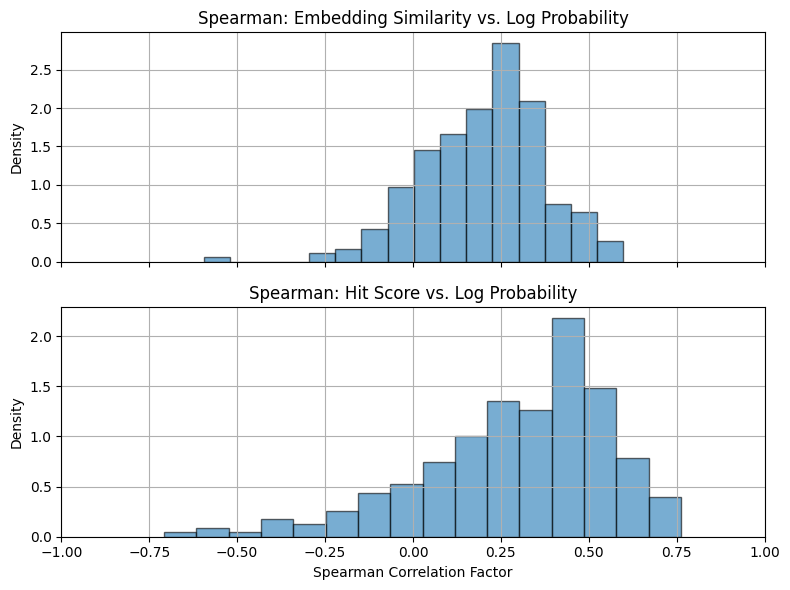

In [13]:
import matplotlib.pyplot as plt

bins = int(np.sqrt(len(spearman_embedding)) + 1)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

# First plot: Embedding Spearman
axes[0].hist(spearman_embedding, bins=bins, density=True, alpha=0.6, edgecolor='black')
axes[0].set_ylabel("Density")
axes[0].set_title("Spearman: Embedding Similarity vs. Log Probability")
axes[0].grid(True)
axes[0].set_xlim(-1, 1)

# Second plot: Hit Score Spearman
axes[1].hist(spearman_hit, bins=bins, density=True, alpha=0.6, edgecolor='black')
axes[1].set_xlabel("Spearman Correlation Factor")
axes[1].set_ylabel("Density")
axes[1].set_title("Spearman: Hit Score vs. Log Probability")
axes[1].grid(True)
axes[1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()


# Release Resources

In [14]:
import torch.distributed as dist

if dist.is_initialized():
    dist.destroy_process_group()